------------
INSTRUCTIONS
-------------

Run each cell from top to bottom. The final cell allows you to save an .mp4 movie of the animation you generated, if you generated an animation. Running the final cell is not mandatory, only do it if you generated a movie and want to save it. The movie will be saved to the folder where this code is stored.

If this is your first time running the code, type ctrl + F and then type r'C, this will take you to the parts of the code where an instruction to read a specific path in your computer is given. Make sure that the path exists in your computer and that it corresponds to the path where the file being specified can be found.

------------
DESCRIPTIONS
-------------

File type (PDB or CIF): The crystal structure file extension. Suggested value: PDB.

File name: The name of the file containing the crystal structure (do not include the extension).

Use color map?: If there is a B-factors file available for the molecule you wish to graph, you can choose to color map it according to its B-factors.

B-factors file: This will be asked if you decide to color map the molecule. This parameter refers to the name of the file containing the B-factors of the molecule you wish to graph. Suggested value: no.

Show axes?: Type "yes" if you want to see the cartesian axes, "no" if otherwise. Suggested value: yes.

Draw bonds?: Type "yes" if you want bonds to be drawn between nodes, type "no" if otherwise. Drawing nodes will require more computation time. If you choose to draw the bonds, you will be asked to give a cutoff distance for the drawing. It would make sense to choose the same cutoff distance that you chose for the normal mode analysis. Suggested value: no.

Minimum interatomic distance (angstroms): This output tells you the minimum distance between two nodes in the elastic network.

Average interatomic distance (angstroms): This output tells you the average distance between nodes in the elastic network.

Maximum interatomic distance (angstroms): This output tells you the maximum distance between two nodes in the elastic network.

Cutoff distance (angstroms): Interaction between pairs of nodes will be limited to nodes separated by a distance less than or equal to the cutoff distance. By this point, the program will have shown you minimum, average, and maximum interatomic distances of the elastic network; use that information to decide. Suggested value: 12.

Animate (rotation)?: Type "yes" if you want the molecule to automatically rotate about its own axis. Suggested value: no.

Graph scaling factor: This is related to the size of the graph. A large number will result in a very small representation of the molecule. Suggested value: 1.

Node size: How big do you want the nodes to be? Suggested value: 20 to 50 for small biomolecules (such as a protein), 0.5 or 1 for bigger biomolecules (such as an entire viral capsid).

Annotate nodes?: Type "yes" if you want each individual node of the elastic network to be annotated (alpha carbon atoms only), type "no" if otherwise. Suggested value: no.

Angle 1 (in degrees): Graph angle. Suggested value: 0.

Angle 2 (in degrees): Graph angle. Suggested value: 0.

In [1]:
# LIBRARIES AND FUNCTIONS

# Libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation
from pathlib import Path
import pandas as pd
import numpy as np
import os

# Integer validation
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
    return False

# String substraction
def substract(a, b):                              
    return "".join(a.rsplit(b))

In [8]:
# FILE AND GRAPH TYPE

# File type
FileType = 0
while FileType == 0:
    FileType = input('\033[1m' + 'File type (PDB or CIF): ' + '\033[0')
    if FileType not in {'PDB', 'CIF'}:
        FileType = 0
        print('Invalid file type')
    elif FileType in {'PDB', 'CIF'}:
        FileType = str(FileType)

# File directory
FileName = 0
boolx = False
while FileName == 0:
    path = 0
    FileName = input('\033[1m' + 'File name: ' + '\033[0')
    if FileName.startswith('C') == True:
        boolx = True
    if boolx == True:
        MolChem = 'homogeneous'
    elif boolx == False:
        MolChem = 'heterogeneous'
    if FileType == 'PDB':
        FileName = FileName + '.pdb'
    elif FileType == 'CIF':
        FileName = FileName + '.cif'
    path  = os.path.join(r'C:\Users\santi\Desktop\2019\Biophysics\PDBs', FileName)
    if Path(path).is_file():
        if FileType == 'PDB':
            MoleculeName = substract(FileName,'.pdb')
        elif FileType == 'CIF':
            MoleculeName = substract(FileName,'.cif')
    else:
        FileName = 0
        print('File not found')

# Graph type
GraphType = 0
if MolChem == 'homogeneous':
    GraphType = 'backbone'
elif MolChem == 'heterogeneous':
    while GraphType == 0:
        GraphType = input('\033[1m' + 'Graph type (full or backbone): ' + '\033[0')
        if GraphType not in {'full', 'backbone'}:
            GraphType = 0
            print('Invalid graph type')
        elif FileType in {'full', 'backbone'}:
            GraphType = str(GraphType)

if GraphType == 'backbone':
    # Color map
    ColorMap = 0
    while ColorMap == 0:
        ColorMap = input('\033[1m' + 'Use color map? ' + '\033[0')
        if ColorMap not in {'yes', 'no'}:
            ColorMap = 0
            print('Answer must be yes or no')
        elif ColorMap in {'yes', 'no'}:
            ColorMap = str(ColorMap)
elif GraphType == 'full':
    ColorMap = 'no'
        
# Backbone   
N = 0
with open(path) as file:
    for line in file:
        if line[:4] == 'ATOM':
            if MolChem == 'homogeneous':
                N += 1
            elif MolChem == 'heterogeneous':
                if FileType == 'PDB':
                    if line[13:15] == "CA":
                        N += 1
                elif FileType == 'CIF':
                    if line[15:17] == 'CA':
                        N += 1
file.closed
N = int(N)    
# Atomic coordinates
x0 = np.zeros((N))
y0 = np.zeros((N))
z0 = np.zeros((N))
counter = 0
with open(path) as file:
    for line in file:
        if line[:4] == 'ATOM':
            if MolChem == 'homogeneous':
                counter += 1
                x0[counter-1] = line[30:38]
                y0[counter-1] = line[38:46]
                z0[counter-1] = line[46:54]
            elif MolChem == 'heterogeneous':
                if FileType == 'PDB':
                    if line[13:15] == "CA":
                        counter += 1
                        x0[counter-1] = line[30:38]
                        y0[counter-1] = line[38:46]
                        z0[counter-1] = line[46:54]
                elif FileType == 'CIF':
                    if line[15:17] == 'CA':
                        counter += 1
                        x0[counter-1] = line[36:44]
                        y0[counter-1] = line[44:53]
                        z0[counter-1] = line[53:61]
file.closed

# Rest of the molecule
NNC = 0
with open(path) as file:
    for line in file:
        if line[:4] == 'ATOM':
            if MolChem == 'homogeneous':
                NNC += 1
            elif MolChem == 'heterogeneous':
                if FileType == 'PDB':
                    if line[13:15] != "CA":
                        NNC += 1
                elif FileType == 'CIF':
                    if line[15:17] != 'CA':
                        NNC += 1
file.closed
NNC = int(NNC)
# Atomic coordinates
x0NC = np.zeros((NNC))
y0NC = np.zeros((NNC))
z0NC = np.zeros((NNC))
counter = 0
with open(path) as file:
    for line in file:
        if line[:4] == 'ATOM':
            if MolChem == 'homogeneous':
                counter += 1
                x0NC[counter-1] = line[30:38]
                y0NC[counter-1] = line[38:46]
                z0NC[counter-1] = line[46:54]
            elif MolChem == 'heterogeneous':
                if FileType == 'PDB':
                    if line[13:15] != "CA":
                        counter += 1
                        x0NC[counter-1] = line[30:38]
                        y0NC[counter-1] = line[38:46]
                        z0NC[counter-1] = line[46:54]
                elif FileType == 'CIF':
                    if line[15:17] != 'CA':
                        counter += 1
                        x0NC[counter-1] = line[36:44]
                        y0NC[counter-1] = line[44:53]
                        z0NC[counter-1] = line[53:61]
file.closed

if ColorMap == 'yes':
    # B-factors file directory
    BFactorsFile = 0
    while BFactorsFile == 0:
        BFactorsFile = input('\033[1m' + 'B-factors file: ' + '\033[0')
        if 'B-factors' not in BFactorsFile:
            BFactorsFile = 0
            print('This is not a B-factors file')
        elif 'B-factors' in BFactorsFile:
            BFactorsFile = BFactorsFile + '.csv'
            BFactorsPath  = os.path.join(r'C:\Users\santi\Desktop\2019\Biophysics\Data', BFactorsFile)
            if Path(BFactorsPath).is_file() == False:
                BFactorsFile = 0
                print('File not found')
    dfBFactors = pd.read_csv(BFactorsPath)
    dfBFactors.index = np.arange(1, len(dfBFactors) + 1)
    BFactors = np.zeros((len(dfBFactors)))
    for i in range(0, len(dfBFactors)):
        BFactors[i] = dfBFactors['B-factors (angstroms^2)'][i+1]
    BFactors = (BFactors-np.nanmin(BFactors))/(np.nanmax(BFactors) - np.nanmin(BFactors))    

print('Done')

File type (PDB or CIF): PDB
File name: 5N7W
Graph type (full or backbone): backbone
Use color map? yes
B-factors file: 5N7W_CG_theoreticalB-factors_293.0K_100modes
Done


Show axes?: yes
Draw bonds? no
Annotate nodes? no
Animate (rotation)? no
Animate (color map)? yes
Maximum normalized value: 10
Node size: 1
Graph scaling factor: 1.5


<IPython.core.display.Javascript object>


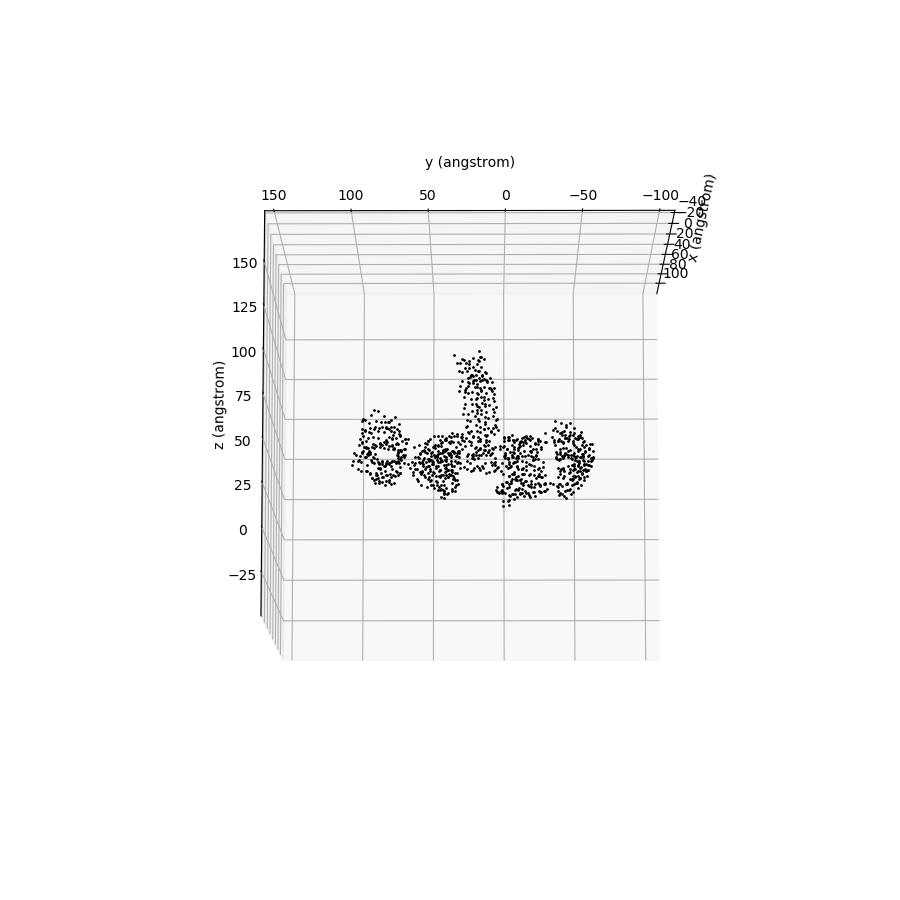

In [9]:
# MOLECULE GRAPH

# Enable dynamic graphs mode
%matplotlib nbagg

# Ask if axes should be shown
ShowAxes = 0
while ShowAxes == 0:
    ShowAxes = input('\033[1m' + 'Show axes?: ' + '\033[0')
    if ShowAxes not in ['yes', 'no']:
        ShowAxes = 0
        print('Answer must be yes or no')

# Ask if bonds should be drawn
DrawBonds = 0
while DrawBonds == 0:
    DrawBonds = input('\033[1m' + 'Draw bonds? ' + '\033[0')
    if DrawBonds not in {'yes', 'no'}:
        DrawBonds = 0
        print('Answer must be yes or no')

# Annotate points?
Annotate = 0
while Annotate == 0:
    Annotate = input('\033[1m' + 'Annotate nodes? ' + '\033[0')
    if Annotate not in {'yes', 'no'}:
        Annotate = 0
        print('Answer must be yes or no')
    elif Annotate in {'yes', 'no'}:
        Annotate = str(Annotate)

if DrawBonds == 'yes':
    # Equillibrium interatomic distances matrix
    d0 = np.zeros((N, N))
    for i in range(0, N):
        for j in range(0, N):
            if i-j < 0:
                d0[i,j] = np.sqrt((x0[i] - x0[j])**2 + (y0[i] - y0[j])**2 + (z0[i] - z0[j])**2)
                d0[j,i] = d0[i,j]
    d0Min = np.around(np.amin(d0[np.nonzero(d0)]), 3) # Calculate minimum interatomic distance ignoring zeroes in d0
    d0Sum = 0
    for i in range(0, len(d0)): # Calculate average interatomic distance ignoring zeroes in d0
        for j in range(0, len(d0)):
            d0Sum = d0Sum + d0[i,j]
    d0Average = np.around(d0Sum/np.count_nonzero(d0), 3)
    d0Max = np.around(np.amax(d0), 3)
    print('Minimum interatomic distance (angstroms): ' + str(d0Min))
    print('Average interatomic distance (angstroms): ' + str(d0Average))
    print('Maximum interatomic distance (angstroms): ' + str(d0Max))
    # Cutoff distance
    CutoffDistance = 0
    while CutoffDistance == 0:
        CutoffDistance = input('\033[1m' + 'Cutoff distance (angstroms): ' + '\033[0')
        if is_number(CutoffDistance) == True:
            if float(CutoffDistance) < 0:
                CutoffDistance = 0
                print('Must be positive')
            elif float(CutoffDistance) == 0:
                print('Cutoff distance cannot be zero')
            else:
                CutoffDistance = float(CutoffDistance)
        else:
            CutoffDistance = 0
            print('Must be a number')
            
# Show assymetric unit?
if ColorMap != 'yes':
    if 'AU' not in MoleculeName:
        if MoleculeName.startswith('C') == False:
            AU = 0
            while AU == 0:
                AU = input('\033[1m' + 'Highlight assymetric unit? ' + '\033[0')
                if AU not in {'yes', 'no'}:
                    AU = 0
                    print('Answer must be yes or no')
    else:
        AU = 'no'
elif ColorMap == 'yes':
    AU = 'no'

# Asymmetric unit
if AU == 'yes':
    # List with residue IDs (numbers)
    ResidueID = []
    with open(path) as file:
        for line in file:
            if line[:4] == 'ATOM':
                if FileType == 'PDB':
                    if line[13:15] == 'CA':
                        ResidueID.append(line[23:26])
                elif FileType == 'CIF':
                    if line[15:17] == 'CA':
                        ResidueID.append(line[31:34])
    file.closed
    # Boolean array comparing difference between CA residue IDs
    BResidueID = [int(ResidueID[i+1]) < int(ResidueID[i]) for i in range(len(ResidueID)-1)]
    # List with indices of chain switch (when next CA residue ID is less than the previous one)
    ChainSwitchIndex = []
    for i in range(0, len(BResidueID)):
        if BResidueID[i] == True:
            ChainSwitchIndex.append(i)
    n = ChainSwitchIndex[0] + 1
    
# Animate graph (rotation)?
Animate = 0
while Animate == 0:
    Animate = input('\033[1m' + 'Animate (rotation)? ' + '\033[0')
    if Animate not in {'yes', 'no'}:
        Animate = 0
        print('Answer must be yes or no')
        
if Animate == 'no':
    if ColorMap == 'yes':
        AnimateBFactors = 0
        while AnimateBFactors == 0:
            AnimateBFactors = input('\033[1m' + 'Animate (color map)? ' + '\033[0')
            if AnimateBFactors not in {'yes', 'no'}:
                AnimateBFactors = 0
                print('Answer must be yes or no')
    elif ColorMap == 'no':
        AnimateBFactors = 'no'
        # Initial angles
        Angle1 = -1
        Angle2 = -1
        while Angle1 == -1:
            Angle1 = input('\033[1m' + 'Angle 1 (in degrees): ' + '\033[0')
            if is_number(Angle1) == True:
                if float(Angle1) < 0:
                    Angle1 = -1
                    print('Must be positive')
                elif float(Angle1) > 360:
                    Angle1 = -1
                    print('Cannot be greater than 360°')
                else:
                    Angle1 = float(Angle1)
            else:
                Angle1 = -1
                print('Must be a number')
        while Angle2 == -1:
            Angle2 = input('\033[1m' + 'Angle 2 (in degrees): ' + '\033[0')
            if is_number(Angle2) == True:
                if float(Angle2) < 0:
                    Angle2 = -1
                    print('Must be positive')
                elif float(Angle2) > 360:
                    Angle2 = -1
                    print('Cannot be greater than 360°')
                else:
                    Angle2 = float(Angle2)
            else:
                Angle2 = -1
                print('Must be a number')  
elif Animate == 'yes':
    AnimateBFactors = 'no'

if AnimateBFactors == 'yes':
    if DrawBonds == 'yes':
        DrawBonds = 'no'
        print('Bond drawing instruction set to no')
    if Annotate == 'yes':
        Annotate = 'no'
        print('Node annotation instruction set to no')
    # Maximum normalized value
    MaxNormalizedValue = 0
    while MaxNormalizedValue == 0:
        MaxNormalizedValue = input('\033[1m' + 'Maximum normalized value: ' + '\033[0')
        if is_number(MaxNormalizedValue) == True:
            if float(MaxNormalizedValue) < 0:
                MaxNormalizedValue = 0
                print('Must be positive')
            elif float(MaxNormalizedValue) == 0:
                print('Maximum normalized value cannot be zero')
            else:
                MaxNormalizedValue = float(MaxNormalizedValue)
        else:
            MaxNormalizedValue = 0
            print('Must be a number')
            
# Marker size
MarkerSize = 0
while MarkerSize == -0:
    MarkerSize = input('\033[1m' + 'Node size: ' + '\033[0')
    if is_number(MarkerSize) == True:
        if float(MarkerSize) < 0:
            MarkerSize = 0
            print('Must be positive')
        elif float(MarkerSize) == 0:
            MarkerSize = 0
            print('Cannot be zero')
        elif float(MarkerSize) > 50:
            MarkerSize = 0
            print('Cannot be greater than 50')
        else:
            MarkerSize = float(MarkerSize)
    else:
        MarkerSize = 0
        print('Must be a number')
    
# Axes scaling factor
ScalingFactor = 0
while ScalingFactor == 0:
    ScalingFactor = input('\033[1m' + 'Graph scaling factor: ' + '\033[0')
    if is_number(ScalingFactor) == True:
        if float(ScalingFactor) < 0:
            ScalingFactor = 0
            print('Must be positive')
        elif float(ScalingFactor) == 0:
            ScalingFactor = 0
            print('Scaling factor cannot be zero')
        elif float(ScalingFactor) > 5:
            ScalingFactor = 0
            print('Scaling factor cannot be greater than 5')
        else:
            ScalingFactor = float(ScalingFactor)
    else:
        ScalingFactor = 0
        print('Must be a number')
        
# Build figure object
fig1 = plt.figure(figsize = (9, 9))
ax1 = fig1.add_subplot(111, projection = '3d')
        
# x-axis parameters
ax1.set_xlabel('x (angstrom)')
xmin = np.amin(x0)
xmax = np.amax(x0)
if xmin < 0 and xmax < 0:
    ax1.set_xlim(ScalingFactor*xmin, -ScalingFactor*xmax)
if xmin < 0 and xmax > 0:
    ax1.set_xlim(ScalingFactor*xmin, ScalingFactor*xmax)
if xmin > 0 and xmax > 0:
    ax1.set_xlim(-ScalingFactor*xmin, ScalingFactor*xmax)
# y-axis parameters
ax1.set_ylabel('y (angstrom)')
ymin = np.amin(y0)
ymax = np.amax(y0)
if ymin < 0 and ymax < 0:
    ax1.set_ylim(ScalingFactor*ymin, -ScalingFactor*ymax)
if ymin < 0 and ymax > 0:
    ax1.set_ylim(ScalingFactor*ymin, ScalingFactor*ymax)
if ymin > 0 and ymax > 0:
    ax1.set_ylim(-ScalingFactor*ymin, ScalingFactor*ymax)
# z-axis parameters
ax1.set_zlabel('z (angstrom)')
zmin = np.amin(z0)
zmax = np.amax(z0)
if zmin < 0 and zmax < 0:
    ax1.set_zlim(ScalingFactor*zmin, -ScalingFactor*zmax)
if zmin < 0 and zmax > 0:
    ax1.set_zlim(ScalingFactor*zmin, ScalingFactor*zmax)
if zmin > 0 and zmax > 0:
    ax1.set_zlim(-ScalingFactor*zmin, ScalingFactor*zmax)
if Annotate == 'yes':
    AtomNumber = np.arange(1, N + 1, 1)
    for x, y, z, AtomNumber in zip(x0, y0, z0, AtomNumber):
        label = '%d' % (AtomNumber)
        ax1.text(x, y, z, label, fontsize = 7, color = 'blue')
# Show or hide axes
if ShowAxes == 'no':
    ax1.set_axis_off()
elif ShowAxes == 'yes':
    ax1.set_axis_on()
    
# If graph shouldn't be animated simply generate the static graph
if Animate == 'no' and AnimateBFactors == 'no':
    # Equilibrium position graph   
    if AU == 'yes':
        if GraphType == 'backbone':
            ax1.scatter(x0, y0, z0, c = 'gray', s = MarkerSize, marker = 'o')
            ax1.scatter(x0[0*n:1*n-1], y0[0*n:1*n-1], z0[0*n:1*n-1], c = 'black', s = 10*MarkerSize, marker = 'o')
            ax1.view_init(Angle1, Angle2) # Initial angle
        elif GraphType == 'full':
            ax1.scatter(x0, y0, z0, c = 'gray', s = MarkerSize, marker = 'o')
            ax1.scatter(x0[0*n:1*n-1], y0[0*n:1*n-1], z0[0*n:1*n-1], c = 'black', s = 10*MarkerSize, marker = 'o')
            ax1.view_init(Angle1, Angle2) # Initial angle
    elif AU == 'no':
        if GraphType == 'backbone':
            if ColorMap == 'yes':                    
                ax1.scatter(x0, y0, z0, c = BFactors, cmap = 'cool', s = MarkerSize, marker = 'o')
                ax1.view_init(Angle1, Angle2) # Initial angle
            elif ColorMap == 'no':
                ax1.scatter(x0, y0, z0, c = 'black', s = MarkerSize, marker = 'o')
                ax1.view_init(Angle1, Angle2) # Initial angle
    # Check if bonds should be drawn
    if DrawBonds == 'yes':
        for u in range(0,N):
            for j in range (0,N):
                if d0[u,j] < CutoffDistance:
                    ax1.plot3D([x0[j], x0[u]], [y0[j], y0[u]], [z0[j], z0[u]], c = 'gray', linewidth = 0.1, linestyle = '-')
    plt.show()
    
# Check if graph should be animated (rotation)
if Animate == 'yes':
    # Define initial state
    def init():
        # Equilibrium position graph
        if AU == 'yes':
            if GraphType == 'backbone':
                ax1.scatter(x0, y0, z0, c = 'gray', s = MarkerSize, marker = 'o')
                ax1.scatter(x0[0*n:1*n-1], y0[0*n:1*n-1], z0[0*n:1*n-1], c = 'black', s = 10*MarkerSize, marker = 'o')
            elif GraphType == 'full':
                ax1.scatter(x0, y0, z0, c = 'gray', s = MarkerSize, marker = 'o')
                ax1.scatter(x0[0*n:1*n-1], y0[0*n:1*n-1], z0[0*n:1*n-1], c = 'black', s = 10*MarkerSize, marker = 'o')
        elif AU == 'no':
            if GraphType == 'backbone':
                if ColorMap == 'yes':                    
                    ax1.scatter(x0, y0, z0, c = BFactors, cmap = 'cool', s = MarkerSize, marker = 'o')
                elif ColorMap == 'no':
                    ax1.scatter(x0, y0, z0, c = 'black', s = MarkerSize, marker = 'o')
        # Check if bonds should be drawn
        if DrawBonds == 'yes':
            for u in range(0,N):
                for j in range (0,N):
                    if d0[u,j] < CutoffDistance:
                        ax1.plot3D([x0[j], x0[u]], [y0[j], y0[u]], [z0[j], z0[u]], c = 'gray', linewidth = 0.1, linestyle = '-')
        return fig1,
    # Define animation
    def animate(i):
        # azimuth angle : 0 deg to 360 deg
        ax1.view_init(elev=0, azim=4*i)
        return fig1,
    # Generate the animation
    ani = matplotlib.animation.FuncAnimation(fig1, animate, init_func=init, frames = 90, interval = 50, blit = True)

# Check if graph should be animated (color map)
if AnimateBFactors == 'yes':
    # Time array that counts from 0 to N, 5 times each (molecule goes from origin to extreme to origin to extreme to origin)
    t = np.array([np.ones(N)*i for i in range(8)]).flatten()
    # Vectors containing all the modified coordinates
    x0Motion = np.zeros((8*N))
    y0Motion = np.zeros((8*N))
    z0Motion = np.zeros((8*N))
    for i in range(0, N):
        x0Motion[i] = x0[i]
        y0Motion[i] = y0[i]
        z0Motion[i] = z0[i]
    for i in range(N, 2*N):
        x0Motion[i] = x0[i-N] + (MaxNormalizedValue*BFactors[i-N])/2
        y0Motion[i] = y0[i-N] + (MaxNormalizedValue*BFactors[i-N])/2
        z0Motion[i] = z0[i-N] + (MaxNormalizedValue*BFactors[i-N])/2
    for i in range(2*N, 3*N):
        x0Motion[i] = x0[i-2*N] + MaxNormalizedValue*BFactors[i-2*N]
        y0Motion[i] = y0[i-2*N] + MaxNormalizedValue*BFactors[i-2*N]
        z0Motion[i] = z0[i-2*N] + MaxNormalizedValue*BFactors[i-2*N]
    for i in range(3*N, 4*N):
        x0Motion[i] = x0[i-3*N] + (MaxNormalizedValue*BFactors[i-3*N])/2
        y0Motion[i] = y0[i-3*N] + (MaxNormalizedValue*BFactors[i-3*N])/2
        z0Motion[i] = z0[i-3*N] + (MaxNormalizedValue*BFactors[i-3*N])/2
    for i in range(4*N, 5*N):
        x0Motion[i] = x0[i-4*N]
        y0Motion[i] = y0[i-4*N]
        z0Motion[i] = z0[i-4*N]
    for i in range(5*N, 6*N):
        x0Motion[i] = x0[i-5*N] - (MaxNormalizedValue*BFactors[i-5*N])/2
        y0Motion[i] = y0[i-5*N] - (MaxNormalizedValue*BFactors[i-5*N])/2
        z0Motion[i] = z0[i-5*N] - (MaxNormalizedValue*BFactors[i-5*N])/2
    for i in range(6*N, 7*N):
        x0Motion[i] = x0[i-6*N] - MaxNormalizedValue*BFactors[i-6*N]
        y0Motion[i] = y0[i-6*N] - MaxNormalizedValue*BFactors[i-6*N]
        z0Motion[i] = z0[i-6*N] - MaxNormalizedValue*BFactors[i-6*N]
    for i in range(7*N, 8*N):
        x0Motion[i] = x0[i-7*N] - (MaxNormalizedValue*BFactors[i-7*N])/2
        y0Motion[i] = y0[i-7*N] - (MaxNormalizedValue*BFactors[i-7*N])/2
        z0Motion[i] = z0[i-7*N] - (MaxNormalizedValue*BFactors[i-7*N])/2
    df = pd.DataFrame({'time': t ,'x' : x0Motion, 'y' : y0Motion, 'z' : z0Motion}) # Dataframe containing all coordinates
    # FuncAnimation function argument
    def animate(i):
        data = df[df['time'] == i]
        graph.set_data (data.x, data.y)
        graph.set_3d_properties(data.z)
        return graph,
    data = df[df['time'] == 0] # Initial dataset for the animated graph
    graph, = ax1.plot(data.x, data.y, data.z, linestyle = '', marker = 'o', color = 'black', markersize = MarkerSize) # Graph's main parameters
    # Generate the animation
    ani = matplotlib.animation.FuncAnimation(fig1, animate, frames = 8, blit = True, interval = 200)
    plt.show()

In [ ]:
# SAVE ANIMATION

if Animate == 'yes':
    if AU == 'yes':
        ani.save(MoleculeName + '_equilibrium_withAU.mp4', writer = 'ffmpeg', fps = 10)
    else:
        ani.save(MoleculeName + '_equilibrium.mp4', writer = 'ffmpeg', fps = 10)
else:
    print('Animation does not exist')